In [1]:
import pandas as pd

# Load datasets
train = pd.read_csv("alx-movie-recommendation-project-2024/train.csv")
tags = pd.read_csv("alx-movie-recommendation-project-2024/tags.csv")
test = pd.read_csv("alx-movie-recommendation-project-2024/test.csv")
imdb_data = pd.read_csv("alx-movie-recommendation-project-2024/imdb_data.csv")
links= pd.read_csv("alx-movie-recommendation-project-2024/links.csv")
movies = pd.read_csv("alx-movie-recommendation-project-2024/movies.csv")
genome_scores = pd.read_csv("alx-movie-recommendation-project-2024/genome_scores.csv")
genome_tags = pd.read_csv("alx-movie-recommendation-project-2024/genome_tags.csv")



# Check data structure
print('\nThe train data is ')
print(train)
print('\nThe tag data is ')
print(tags)
print('\nThe test data is ')
print(test)
print('\nThe imdb data is ')
print(imdb_data)
print('\nThe links data is ')
print(links)
print('\nThe movies data is ')
print(movies)
print('\nThe genome_scores data is ')
print(genome_scores)
print('\nThe genome_tags data is ')
print(genome_tags)

# Check missing values
print(train.isnull().sum())
print(test.isnull().sum())


The train data is 
          userId  movieId  rating   timestamp
0           5163    57669     4.0  1518349992
1         106343        5     4.5  1206238739
2         146790     5459     5.0  1076215539
3         106362    32296     2.0  1423042565
4           9041      366     3.0   833375837
...          ...      ...     ...         ...
10000033  136395    99114     5.0  1521235092
10000034  140078      553     3.0  1002580977
10000035  154807    56782     4.0  1227674807
10000036   85805      327     4.0  1479921530
10000037  139457     1009     4.0   858984862

[10000038 rows x 4 columns]

The tag data is 
         userId  movieId                  tag   timestamp
0             3      260              classic  1439472355
1             3      260               sci-fi  1439472256
2             4     1732          dark comedy  1573943598
3             4     1732       great dialogue  1573943604
4             4     7569     so bad it's good  1573943455
...         ...      ...         

In [2]:
for df_name, df in [("tags", tags), ("imdb_data", imdb_data), ("links", links), 
                    ("movies", movies), ("genome_scores", genome_scores), ("genome_tags", genome_tags)]:
    print(f"Missing values in {df_name}:\n", df.isnull().sum(), "\n")

Missing values in tags:
 userId        0
movieId       0
tag          16
timestamp     0
dtype: int64 

Missing values in imdb_data:
 movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64 

Missing values in links:
 movieId      0
imdbId       0
tmdbId     107
dtype: int64 

Missing values in movies:
 movieId    0
title      0
genres     0
dtype: int64 

Missing values in genome_scores:
 movieId      0
tagId        0
relevance    0
dtype: int64 

Missing values in genome_tags:
 tagId    0
tag      0
dtype: int64 



In [3]:
tags.dropna(subset=['tag'], inplace=True)

In [4]:
# Remove currency symbols and commas from 'budget'
imdb_data['budget'] = imdb_data['budget'].replace({'\$': '', ',': ''}, regex=True)

# Convert the column to numeric, coercing errors to NaN
imdb_data['budget'] = pd.to_numeric(imdb_data['budget'], errors='coerce')

# Fill missing values with the median
imdb_data['budget'].fillna(imdb_data['budget'].median(), inplace=True)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\dell\AppData\Local\Temp\ipykernel_13488\2126857161.py:2: SyntaxWarning: invalid escape sequence '\$'
  imdb_data['budget'] = imdb_data['budget'].replace({'\$': '', ',': ''}, regex=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_13488\2126857161.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imdb_data['budget'].fillna(imdb_data['budget'].median(), inplace=True)


In [5]:
imdb_data['title_cast'].fillna("Unknown", inplace=True)
imdb_data['director'].fillna("Unknown", inplace=True)
imdb_data['plot_keywords'].fillna("Unknown", inplace=True)
imdb_data['runtime'].fillna(imdb_data['runtime'].median(), inplace=True)
imdb_data['budget'].fillna(imdb_data['budget'].median(), inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_13488\294905611.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imdb_data['title_cast'].fillna("Unknown", inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_13488\294905611.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [6]:
links.dropna(subset=['tmdbId'], inplace=True)

In [7]:
for df_name, df in [("tags", tags), ("imdb_data", imdb_data), ("links", links)]:
    print(f"Missing values in {df_name}:\n", df.isnull().sum(), "\n")

Missing values in tags:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64 

Missing values in imdb_data:
 movieId          0
title_cast       0
director         0
runtime          0
budget           0
plot_keywords    0
dtype: int64 

Missing values in links:
 movieId    0
imdbId     0
tmdbId     0
dtype: int64 



In [8]:
train['timestamp'] = pd.to_datetime(train['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')

In [9]:
popular_movies = train.groupby('movieId')['rating'].count().reset_index()
popular_movies = popular_movies.merge(movies, on='movieId')
popular_movies = popular_movies.sort_values(by='rating', ascending=False)
print(popular_movies.head(10))

      movieId  rating                                      title  \
314       318   32831           Shawshank Redemption, The (1994)   
351       356   32383                        Forrest Gump (1994)   
292       296   31697                        Pulp Fiction (1994)   
585       593   29444           Silence of the Lambs, The (1991)   
2479     2571   29014                         Matrix, The (1999)   
257       260   27560  Star Wars: Episode IV - A New Hope (1977)   
475       480   25518                       Jurassic Park (1993)   
522       527   24004                    Schindler's List (1993)   
108       110   23722                          Braveheart (1995)   
2866     2959   23536                          Fight Club (1999)   

                                genres  
314                        Crime|Drama  
351           Comedy|Drama|Romance|War  
292        Comedy|Crime|Drama|Thriller  
585              Crime|Horror|Thriller  
2479            Action|Sci-Fi|Thriller  
257  

In [10]:
high_rated_movies = train.groupby('movieId')['rating'].mean().reset_index()
high_rated_movies = high_rated_movies.merge(movies, on='movieId')
high_rated_movies = high_rated_movies.sort_values(by='rating', ascending=False)
print(high_rated_movies.head(10))

       movieId  rating                               title  \
48167   208765     5.0  Picture a Perfect Christmas (2019)   
48171   208795     5.0                         Zana (2019)   
48190   208939     5.0                        Klaus (2019)   
28713   142679     5.0              Fire in Babylon (2011)   
44771   194889     5.0           Teenage Superstars (2017)   
33406   159117     5.0                          Ken (1964)   
33408   159127     5.0             Multiple SIDosis (1970)   
33378   159050     5.0             The Pilot's Wife (2005)   
33379   159053     5.0          In Her Line of Fire (2006)   
19851   106115     5.0        Story of Science, The (2010)   

                                    genres  
48167                              Romance  
48171                                Drama  
48190  Adventure|Animation|Children|Comedy  
28713                          Documentary  
44771                          Documentary  
33406                   (no genres listed)  
33

In [11]:
import pandas as pd

# Sample Data (as per your output)
movies = pd.DataFrame({
    'movieId': [318, 356, 296, 593, 2571, 260, 480, 527, 110, 2959],
    'title': ['Shawshank Redemption, The (1994)', 'Forrest Gump (1994)', 'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
            'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)', 'Jurassic Park (1993)', 'Schindler\'s List (1993)',
            'Braveheart (1995)', 'Fight Club (1999)'],
    'genres': ['Crime|Drama', 'Comedy|Drama|Romance|War', 'Comedy|Crime|Drama|Thriller', 'Crime|Horror|Thriller',
                'Action|Sci-Fi|Thriller', 'Action|Adventure|Sci-Fi', 'Action|Adventure|Sci-Fi|Thriller', 'Drama|War', 'Action|Drama|War',
                'Action|Crime|Drama|Thriller']
})

# Movie you want recommendations for (Toy Story is used as an example)
target_movie = 'Toy Story (1995)'  # Example movie
target_genre = 'Animation|Children|Comedy'  # Example genres for Toy Story


# Function to recommend movies based on similar genre
def recommend_similar_movies(movie_title, genre, movies_df):
    # Filter movies by genre similarity (contains the genre of Toy Story)
    similar_movies = movies_df[movies_df['genres'].str.contains(genre)]
    
    # Remove the target movie from the recommendations
    similar_movies = similar_movies[similar_movies['title'] != movie_title]
    
    
    return similar_movies[['title', 'genres']]

# Get recommendations for Toy Story (1995)
recommended_movies = recommend_similar_movies(target_movie, target_genre, movies)
print(recommended_movies)

                 title                       genres
1  Forrest Gump (1994)     Comedy|Drama|Romance|War
2  Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller


In [12]:
# Get popular movies (top 10 based on number of ratings)
popular_movies = train.groupby('movieId')['rating'].count().reset_index()
popular_movies = popular_movies.merge(movies, on='movieId')
popular_movies = popular_movies.sort_values(by='rating', ascending=False)

# Limit to top 10
popular_movies_top_10 = popular_movies.head(10)

# Function to recommend similar movies (same as before)
def recommend_similar_movies(movie_title, genre, movies_df):
    similar_movies = movies_df[movies_df['genres'].str.contains(genre)]
    similar_movies = similar_movies[similar_movies['title'] != movie_title]
    return similar_movies[['title', 'genres']]

# Now apply the recommendation logic on popular movies
for index, row in popular_movies_top_10.iterrows():
    target_movie = row['title']
    target_genre = row['genres']
    
    recommended_movies = recommend_similar_movies(target_movie, target_genre, movies)
    print(f"Recommendations for {target_movie}:\n", recommended_movies, "\n")

Recommendations for Shawshank Redemption, The (1994):
                               title                       genres
1               Forrest Gump (1994)     Comedy|Drama|Romance|War
2               Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller
3  Silence of the Lambs, The (1991)        Crime|Horror|Thriller
7           Schindler's List (1993)                    Drama|War
8                 Braveheart (1995)             Action|Drama|War
9                 Fight Club (1999)  Action|Crime|Drama|Thriller 

Recommendations for Forrest Gump (1994):
                               title                       genres
0  Shawshank Redemption, The (1994)                  Crime|Drama
2               Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller
7           Schindler's List (1993)                    Drama|War
8                 Braveheart (1995)             Action|Drama|War
9                 Fight Club (1999)  Action|Crime|Drama|Thriller 

Recommendations for Pulp Fiction (1994):
             

In [13]:
# Create an empty set to store unique recommendations
all_recommendations = set()

# Iterate over each of the top 10 popular movies
for index, row in popular_movies_top_10.iterrows():
    target_movie = row['title']
    target_genre = row['genres']
    
    # Get recommendations for each movie
    recommended_movies = recommend_similar_movies(target_movie, target_genre, movies)
    
    # Add recommendations to the set (this will eliminate duplicates)
    for movie in recommended_movies['title']:
        all_recommendations.add(movie)

# Convert the set of recommendations back to a DataFrame for easier viewing
unique_recommendations = pd.DataFrame(list(all_recommendations), columns=['title'])

# Display the unique recommendations
print("Unique Movie Recommendations:\n", unique_recommendations)

Unique Movie Recommendations:
                                        title
0                        Forrest Gump (1994)
1           Silence of the Lambs, The (1991)
2                        Pulp Fiction (1994)
3                    Schindler's List (1993)
4  Star Wars: Episode IV - A New Hope (1977)
5                          Braveheart (1995)
6           Shawshank Redemption, The (1994)
7                         Matrix, The (1999)
8                       Jurassic Park (1993)
9                          Fight Club (1999)


In [14]:
movies

,movieId,title,genres
0,318,"Shawshank Redemption, The (1994)",Crime|Drama
1,356,Forrest Gump (1994),Comedy|Drama|Romance|War
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
5,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
7,527,Schindler's List (1993),Drama|War
8,110,Braveheart (1995),Action|Drama|War
9,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [14]:
# Merge the ratings from the train DataFrame with the movies DataFrame
movies_with_ratings = movies.merge(train.groupby('movieId')['rating'].mean().reset_index(), on='movieId', how='left')

# Set minimum rating threshold
rating_threshold = 4.0

# Filter movies based on genre and rating threshold
filtered_recommendations = movies_with_ratings[movies_with_ratings['rating'] >= rating_threshold]

# Apply genre filter (if needed, for example only recommending drama films)
filtered_recommendations = filtered_recommendations[filtered_recommendations['genres'].str.contains('Drama')]

# Display filtered recommendations
print("Filtered Movie Recommendations:\n", filtered_recommendations[['title', 'rating', 'genres']])

Filtered Movie Recommendations:
                               title    rating                       genres
0  Shawshank Redemption, The (1994)  4.417624                  Crime|Drama
1               Forrest Gump (1994)  4.047216     Comedy|Drama|Romance|War
2               Pulp Fiction (1994)  4.195097  Comedy|Crime|Drama|Thriller
7           Schindler's List (1993)  4.247625                    Drama|War
9                 Fight Club (1999)  4.227906  Action|Crime|Drama|Thriller


In [15]:
# Sort recommendations by rating in descending order
sorted_recommendations = filtered_recommendations.sort_values(by='rating', ascending=False)

# Display the top sorted recommendations
print("Top Movie Recommendations Based on Ratings:\n", sorted_recommendations[['title', 'rating', 'genres']])

Top Movie Recommendations Based on Ratings:
                               title    rating                       genres
0  Shawshank Redemption, The (1994)  4.417624                  Crime|Drama
7           Schindler's List (1993)  4.247625                    Drama|War
9                 Fight Club (1999)  4.227906  Action|Crime|Drama|Thriller
2               Pulp Fiction (1994)  4.195097  Comedy|Crime|Drama|Thriller
1               Forrest Gump (1994)  4.047216     Comedy|Drama|Romance|War


In [16]:
# Show top 10 movie recommendations
top_10_recommendations = sorted_recommendations.head(10)
print("Top 10 Movie Recommendations:\n", top_10_recommendations[['title', 'rating', 'genres']])

Top 10 Movie Recommendations:
                               title    rating                       genres
0  Shawshank Redemption, The (1994)  4.417624                  Crime|Drama
7           Schindler's List (1993)  4.247625                    Drama|War
9                 Fight Club (1999)  4.227906  Action|Crime|Drama|Thriller
2               Pulp Fiction (1994)  4.195097  Comedy|Crime|Drama|Thriller
1               Forrest Gump (1994)  4.047216     Comedy|Drama|Romance|War


In [17]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


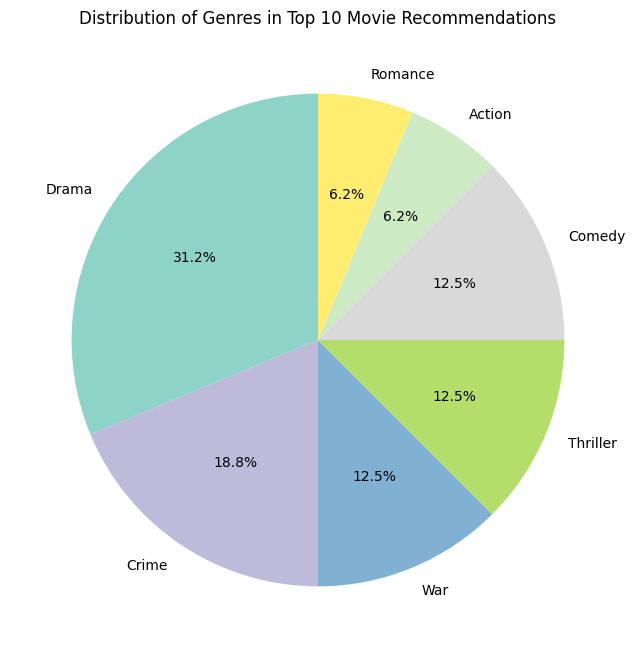

In [18]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each genre in the top 10 recommendations
genre_counts = top_10_recommendations['genres'].str.split('|', expand=True).stack().value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
genre_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Genres in Top 10 Movie Recommendations')
plt.ylabel('')  # Hide the ylabel
plt.show()

In [19]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Assuming 'train' contains 'userId', 'movieId', and 'rating'
# Top N users and movies by rating count
top_n_users = train['userId'].value_counts().head(1000).index
top_n_movies = train['movieId'].value_counts().head(500).index

# Filter the train data to only include the top N users and movies and create a copy
train_filtered = train[train['userId'].isin(top_n_users) & train['movieId'].isin(top_n_movies)].copy()

# Create user and movie mappings to 0-based indices
user_mapping = {user_id: idx for idx, user_id in enumerate(top_n_users)}
movie_mapping = {movie_id: idx for idx, movie_id in enumerate(top_n_movies)}

# Map userId and movieId to 0-based indices
train_filtered.loc[:, 'user_idx'] = train_filtered['userId'].map(user_mapping)
train_filtered.loc[:, 'movie_idx'] = train_filtered['movieId'].map(movie_mapping)

# Create sparse matrix
user_item_sparse = csr_matrix(
    (train_filtered['rating'], (train_filtered['user_idx'], train_filtered['movie_idx']))
)

# Perform SVD
svd = TruncatedSVD(n_components=50, random_state=42)
user_features = svd.fit_transform(user_item_sparse)
movie_features = svd.components_

# Reconstruct the predicted ratings matrix
predicted_ratings_matrix = np.dot(user_features, movie_features)

# Convert predicted ratings matrix back into a DataFrame
predicted_ratings = pd.DataFrame(predicted_ratings_matrix, columns=top_n_movies, index=top_n_users)

# Print the predicted ratings for the top users and movies
print(predicted_ratings.head())


movieId     318       356       296       593       2571      260       480    \
userId                                                                          
72315    2.347430  2.595741  2.107754  1.163639  1.887397  0.627361  1.547425   
80974    0.556291  1.194728  5.213997  0.061777  1.045734  0.397773  2.980409   
137293   3.466899 -0.400955  0.616705  3.310598  3.629985  0.215096  1.476915   
33844    5.107199  2.017787 -0.023189  3.883805  0.777796  0.049459 -0.548220   
20055    2.971119  1.618926  5.483028  1.976735  0.595392  4.643210 -0.367163   

movieId     527       110       2959   ...     53125     1275      1094   \
userId                                 ...                                 
72315    2.156400  2.369785  3.999649  ...  1.120870  0.424458  1.669545   
80974    1.727632  0.029544  0.116127  ...  1.090691  1.463003  1.511858   
137293   2.139584  0.418580  1.552434  ...  0.610032  0.216492  0.896516   
33844    0.502070  2.603774  0.366694  ...  0.873272

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Increase the number of latent factors in SVD
svd = TruncatedSVD(n_components=200, random_state=42)
user_features = svd.fit_transform(user_item_sparse)
movie_features = svd.components_

# Reconstruct the predicted ratings matrix
predicted_ratings_matrix = np.dot(user_features, movie_features)

# Convert predicted ratings matrix back into a DataFrame
predicted_ratings = pd.DataFrame(predicted_ratings_matrix, columns=top_n_movies, index=top_n_users)

# Flatten the predicted and actual ratings for comparison
predicted_ratings_flat = predicted_ratings.values.flatten()
actual_ratings_flat = train_filtered.pivot(index='user_idx', columns='movie_idx', values='rating').values.flatten()

# Remove NaN values from actual ratings
mask = ~np.isnan(actual_ratings_flat)
predicted_ratings_flat = predicted_ratings_flat[mask]
actual_ratings_flat = actual_ratings_flat[mask]

# Experiment with different thresholds for binary classification
threshold = 2.0
predicted_ratings_binary = (predicted_ratings_flat > threshold).astype(int)
actual_ratings_binary = (actual_ratings_flat > threshold).astype(int)

# Compute precision, recall, and F1 score
precision = precision_score(actual_ratings_binary, predicted_ratings_binary, average='binary', pos_label=1, zero_division=0)
recall = recall_score(actual_ratings_binary, predicted_ratings_binary, average='binary', pos_label=1, zero_division=0)
f1 = f1_score(actual_ratings_binary, predicted_ratings_binary, average='binary', pos_label=1, zero_division=0)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.9754929888078216
Recall:  0.8272795991365538
F1 Score:  0.8952936761276665


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_ratings_flat, predicted_ratings_flat))
print("RMSE: ", rmse)

# Calculate MAE
mae = mean_absolute_error(actual_ratings_flat, predicted_ratings_flat)
print("MAE: ", mae)

RMSE:  1.0616249931471455
MAE:  0.8624425927160492
